                                            crime in india

In [20]:
import pandas as pd
import random

# Define states and years
states = [
    "Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Madhya Pradesh", 
    "Tamil Nadu", "Rajasthan", "Karnataka", "Gujarat", "Andhra Pradesh", 
    "Odisha", "Telangana", "Kerala", "Jharkhand", "Assam", 
    "Punjab", "Chhattisgarh", "Haryana", "Uttarakhand", "Himachal Pradesh", 
    "Tripura", "Meghalaya", "Manipur", "Nagaland", "Goa", 
    "Arunachal Pradesh", "Mizoram", "Sikkim"
]

years = list(range(2010, 2020))

crimes = ["Murder", "Rape", "Robbery", "Kidnapping"]

# Data structure for crime data
data = {
    "State": [],
    "Year": [],
    "Type of Crime": [],
    "Number of Cases": []
}

# Generating dummy data for the sake of this example
for state in states:
    for year in years:
        for crime in crimes:
            data["State"].append(state)
            data["Year"].append(year)
            data["Type of Crime"].append(crime)
            data["Number of Cases"].append(random.randint(100, 1000))  # Random data for demonstration

# Creating DataFrame for crime data
crime_df = pd.DataFrame(data)

# Save crime data to CSV
crime_df.to_csv("crime_data_2010_2019.csv", index=False)

# Display the first few rows of the crime DataFrame
print("Crime Data:")
print(crime_df.head())

# Define state data
state_data = {
    "State": [
        "Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Madhya Pradesh", 
        "Tamil Nadu", "Rajasthan", "Karnataka", "Gujarat", "Andhra Pradesh", 
        "Odisha", "Telangana", "Kerala", "Jharkhand", "Assam", 
        "Punjab", "Chhattisgarh", "Haryana", "Uttarakhand", "Himachal Pradesh", 
        "Tripura", "Meghalaya", "Manipur", "Nagaland", "Goa", 
        "Arunachal Pradesh", "Mizoram", "Sikkim"
    ],
    "Population": [
        223897418, 123144223, 124799926, 100671935, 85358965, 
        76347541, 81032689, 70099645, 68918960, 53548533, 
        46356334, 39528247, 35699443, 39945912, 35571834, 
        30141373, 29436231, 28672028, 11250858, 7451955, 
        4155250, 3366710, 3091545, 2232366, 1542750, 
        1570458, 1239244, 690251
    ],
    "Literacy Rate": [
        69.72, 82.34, 70.9, 77.08, 69.32, 
        80.09, 66.11, 75.36, 78.03, 67.02, 
        73.45, 72.8, 96.2, 66.41, 73.18, 
        76.68, 71.04, 76.64, 79.63, 82.8, 
        87.22, 75.48, 79.85, 79.55, 88.7, 
        65.38, 91.33, 81.42
    ],
    "Area": [
        243286, 307713, 94163, 88752, 308350, 
        130058, 342239, 191791, 196024, 162968, 
        155707, 112077, 38863, 79714, 78438, 
        50362, 135192, 44212, 53483, 55673, 
        10486, 22429, 22327, 16579, 3702, 
        83743, 21081, 7096
    ]
}

# Creating DataFrame for state data
state_df = pd.DataFrame(state_data)

# Save state data to CSV
state_df.to_csv("state_data.csv", index=False)

# Display the first few rows of the state DataFrame
print("\nState Data:")
print(state_df.head())


Crime Data:
           State  Year Type of Crime  Number of Cases
0  Uttar Pradesh  2010        Murder              810
1  Uttar Pradesh  2010          Rape              601
2  Uttar Pradesh  2010       Robbery              597
3  Uttar Pradesh  2010    Kidnapping              373
4  Uttar Pradesh  2011        Murder              739

State Data:
            State  Population  Literacy Rate    Area
0   Uttar Pradesh   223897418          69.72  243286
1     Maharashtra   123144223          82.34  307713
2           Bihar   124799926          70.90   94163
3     West Bengal   100671935          77.08   88752
4  Madhya Pradesh    85358965          69.32  308350


In [21]:
crime_df.describe()

,Year,Number of Cases
count,1120.000000,1120.000000
mean,2014.500000,555.975000
std,2.873564,259.972947
min,2010.000000,100.000000
25%,2012.000000,328.750000
50%,2014.500000,561.000000
75%,2017.000000,788.000000
max,2019.000000,1000.000000


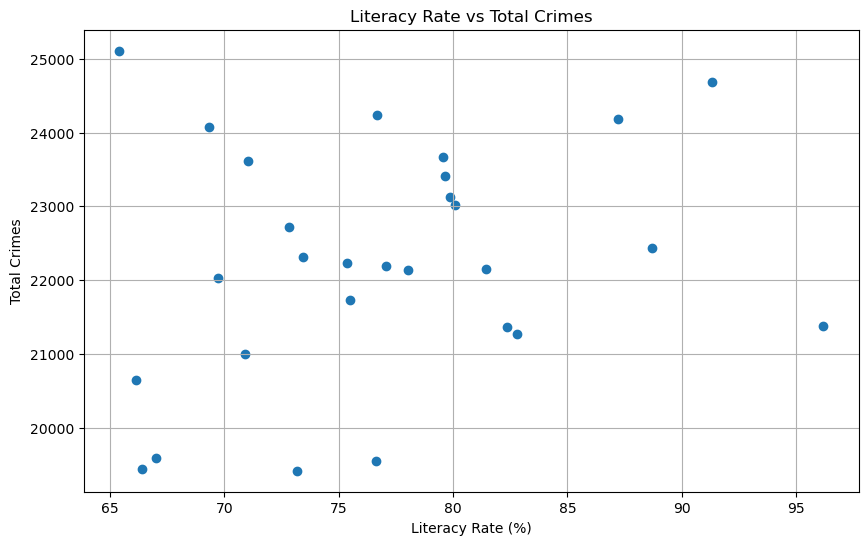

In [13]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load state and crime data
state_data = pd.read_csv("state_data.csv")
crime_data = pd.read_csv("crime_data_2010_2019.csv")

# Aggregate total crimes by state
total_crimes_by_state = crime_data.groupby("State")["Number of Cases"].sum().reset_index()
total_crimes_by_state.columns = ["State/UT", "Total Crimes"]




# Merge state data with total crimes
merged_data = pd.merge(state_data, total_crimes_by_state, left_on="State", right_on="State/UT")

# Scatter plot of Literacy Rate vs Total Crimes
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Literacy Rate"], merged_data["Total Crimes"])
plt.title("Literacy Rate vs Total Crimes")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()



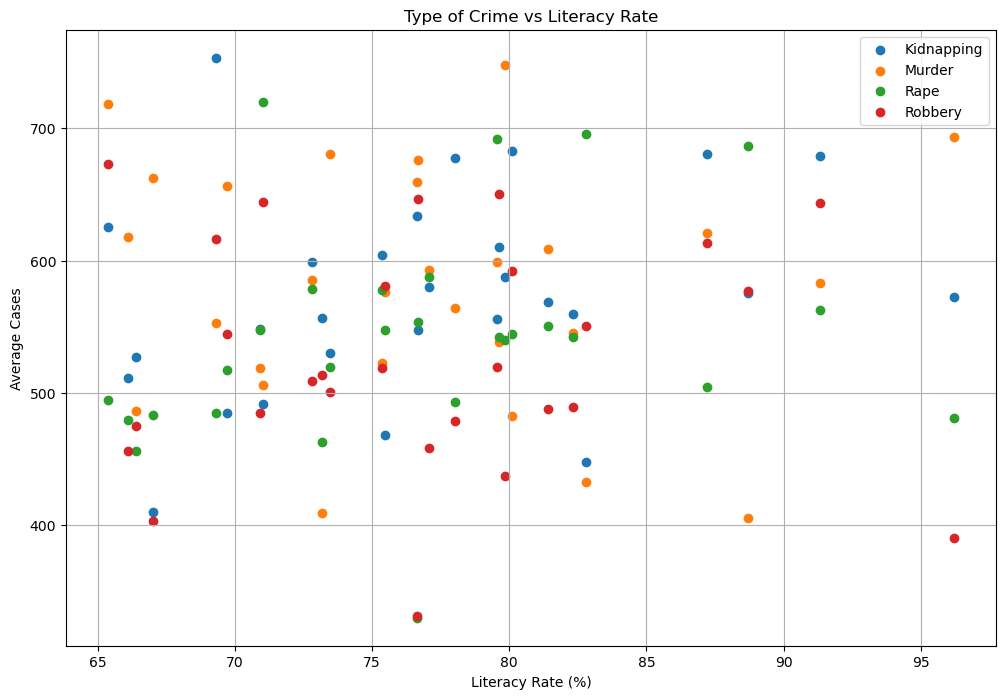

In [14]:
                                    # Visualize the clusters using scatter plot

# Aggregate average number of cases for each crime type by state
crime_by_type = crime_data.groupby(["State", "Type of Crime"])["Number of Cases"].mean().reset_index()
crime_by_type.columns = ["State", "Type of Crime", "Average Cases"]

# Merge crime by type data with state data
merged_crime_type_data = pd.merge(crime_by_type, state_data, left_on="State", right_on="State")

# Scatter plot of Type of Crime vs Literacy Rate
plt.figure(figsize=(12, 8))
for crime_type in merged_crime_type_data["Type of Crime"].unique():
    subset = merged_crime_type_data[merged_crime_type_data["Type of Crime"] == crime_type]
    plt.scatter(subset["Literacy Rate"], subset["Average Cases"], label=crime_type)
plt.title("Type of Crime vs Literacy Rate")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Average Cases")
plt.legend()
plt.grid(True)
plt.show()


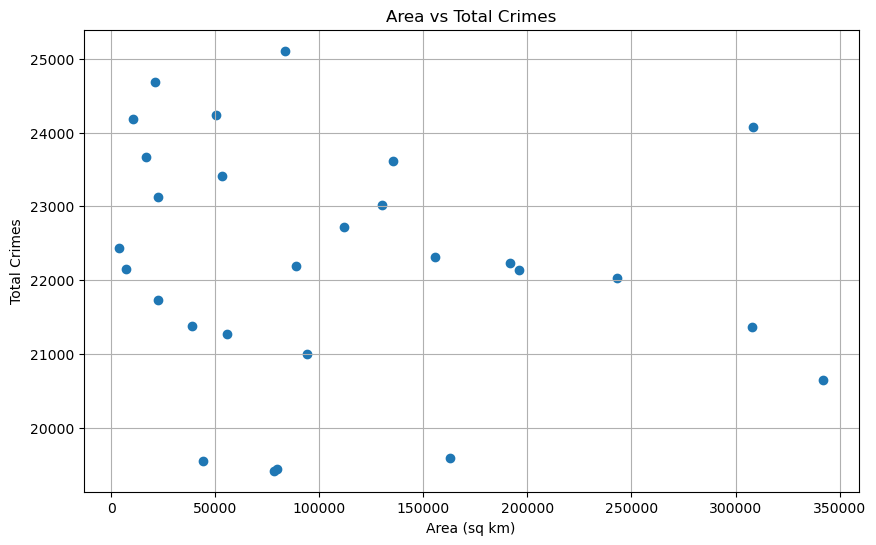

In [15]:
# Scatter plot of Area vs Total Crimes
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Area"], merged_data["Total Crimes"])
plt.title("Area vs Total Crimes")
plt.xlabel("Area (sq km)")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()


In [16]:
merged_data["Area"] = merged_data["Area"].astype(float)
merged_data["Total Crimes"] = merged_data["Total Crimes"].astype(int)


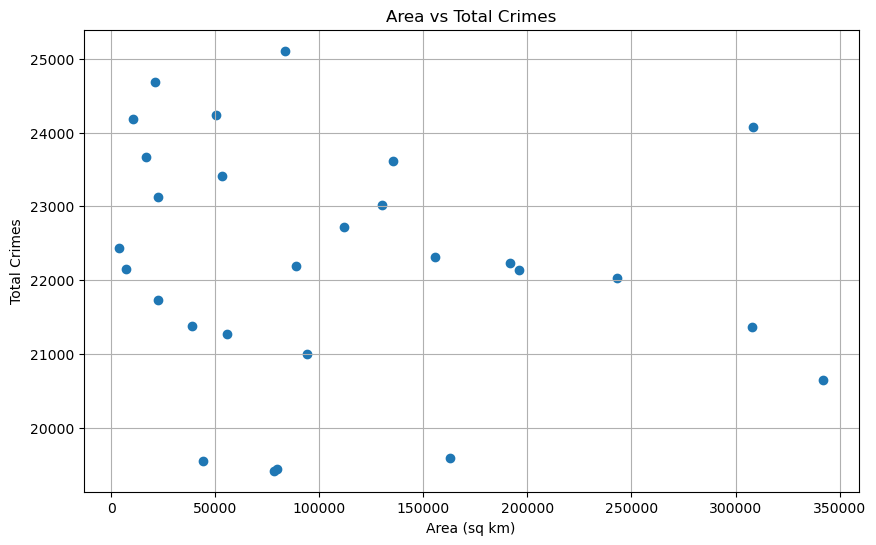

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of Area vs Total Crimes
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Area"], merged_data["Total Crimes"])
plt.title("Area vs Total Crimes")
plt.xlabel("Area (sq km)")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()


In [18]:
for state in merged_data["State/UT"].unique():
    state_specific_data = merged_data[merged_data["State/UT"] == state]
    report = f"Crime Report for {state}\n"
    report += f"Population: {state_specific_data['Population'].values[0]}\n"
    report += f"Literacy Rate: {state_specific_data['Literacy Rate'].values[0]}%\n"
    report += f"Area: {state_specific_data['Area'].values[0]} sq km\n"
    report += f"Total Crimes (2010-2019): {state_specific_data['Total Crimes'].values[0]}\n\n"
        
    # Print the report
    print(report)


Crime Report for Uttar Pradesh
Population: 223897418
Literacy Rate: 69.72%
Area: 243286.0 sq km
Total Crimes (2010-2019): 22034


Crime Report for Maharashtra
Population: 123144223
Literacy Rate: 82.34%
Area: 307713.0 sq km
Total Crimes (2010-2019): 21366


Crime Report for Bihar
Population: 124799926
Literacy Rate: 70.9%
Area: 94163.0 sq km
Total Crimes (2010-2019): 20995


Crime Report for West Bengal
Population: 100671935
Literacy Rate: 77.08%
Area: 88752.0 sq km
Total Crimes (2010-2019): 22192


Crime Report for Madhya Pradesh
Population: 85358965
Literacy Rate: 69.32%
Area: 308350.0 sq km
Total Crimes (2010-2019): 24069


Crime Report for Tamil Nadu
Population: 76347541
Literacy Rate: 80.09%
Area: 130058.0 sq km
Total Crimes (2010-2019): 23020


Crime Report for Rajasthan
Population: 81032689
Literacy Rate: 66.11%
Area: 342239.0 sq km
Total Crimes (2010-2019): 20644


Crime Report for Karnataka
Population: 70099645
Literacy Rate: 75.36%
Area: 191791.0 sq km
Total Crimes (2010-2019

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the data
crime_df = pd.read_csv("crime_data_2010_2019.csv")
state_df = pd.read_csv("state_data.csv")

# Merge crime data with state data
merged_data = pd.merge(crime_df, state_df, on='State')

# Select relevant features for clustering
cluster_data = merged_data[['Literacy Rate', 'Population', 'Area', 'Number of Cases']]

# Step 1: Preprocess the Data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Step 2: Clustering with KMeans Algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(cluster_data_scaled)



# Step 3: Clustering with Agglomerative Clustering Algorithm
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(cluster_data_scaled)



# Step 4: Clustering with DBSCAN Algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(cluster_data_scaled)







C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


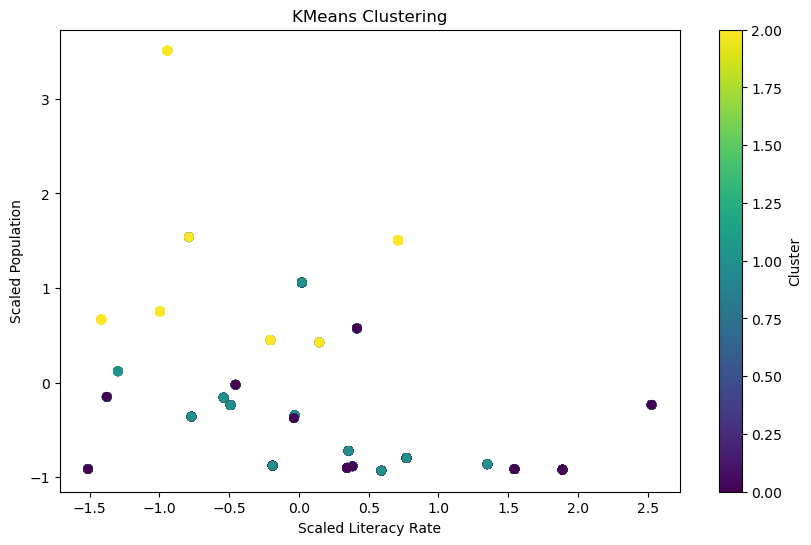

In [20]:
# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Scaled Literacy Rate')
plt.ylabel('Scaled Population')
plt.colorbar(label='Cluster')
plt.show()

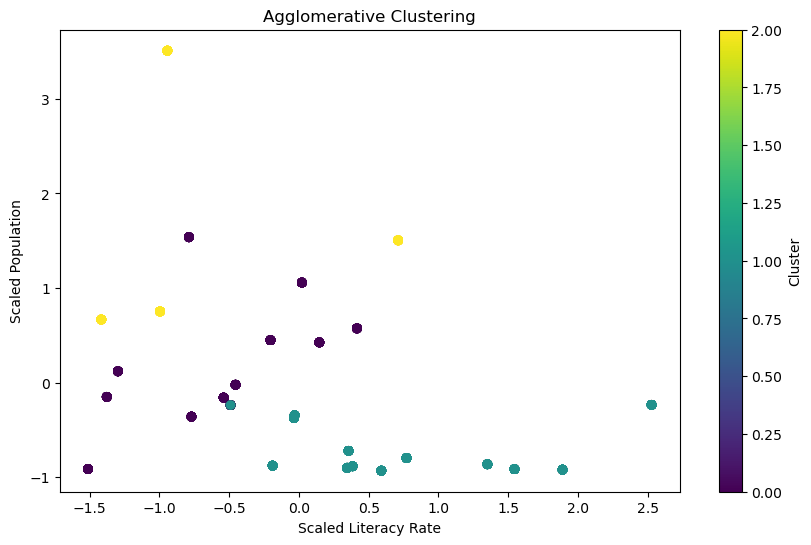

In [21]:
# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Scaled Literacy Rate')
plt.ylabel('Scaled Population')
plt.colorbar(label='Cluster')
plt.show()

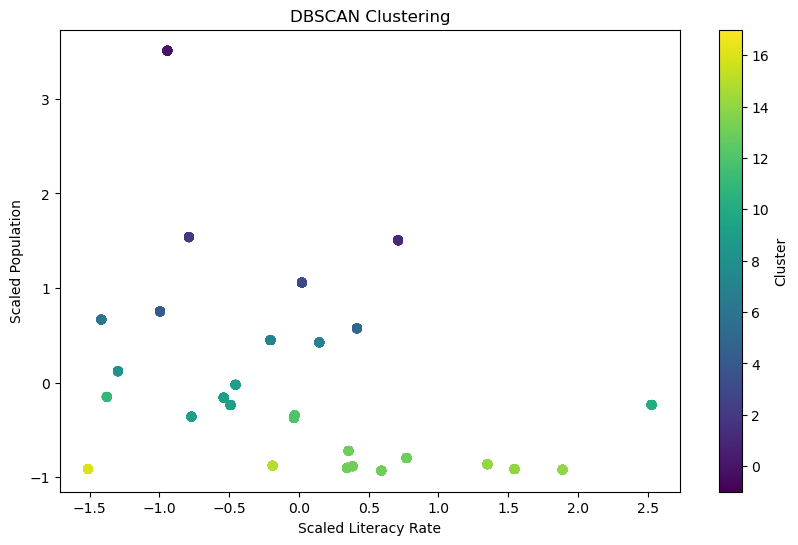

In [22]:
# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Literacy Rate')
plt.ylabel('Scaled Population')
plt.colorbar(label='Cluster')
plt.show()

In [23]:
# Step 5: Clustering with Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(cluster_data_scaled)

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


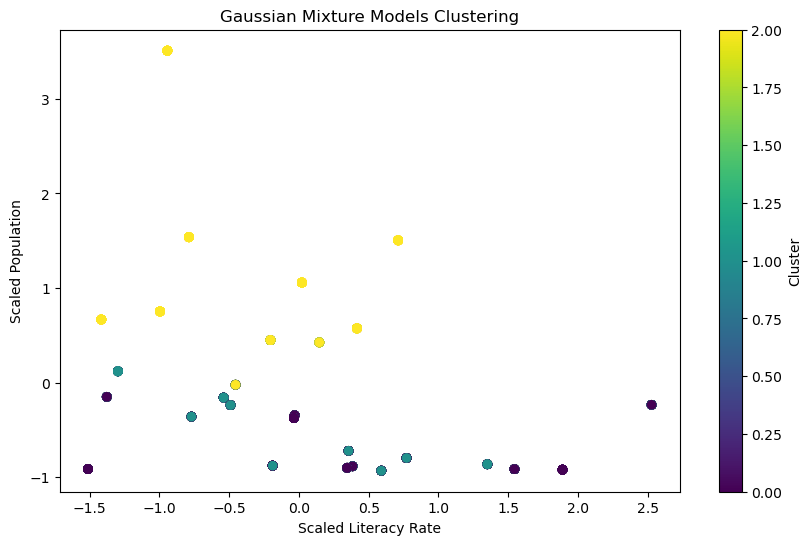

In [24]:
# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('Scaled Literacy Rate')
plt.ylabel('Scaled Population')
plt.colorbar(label='Cluster')
plt.show()


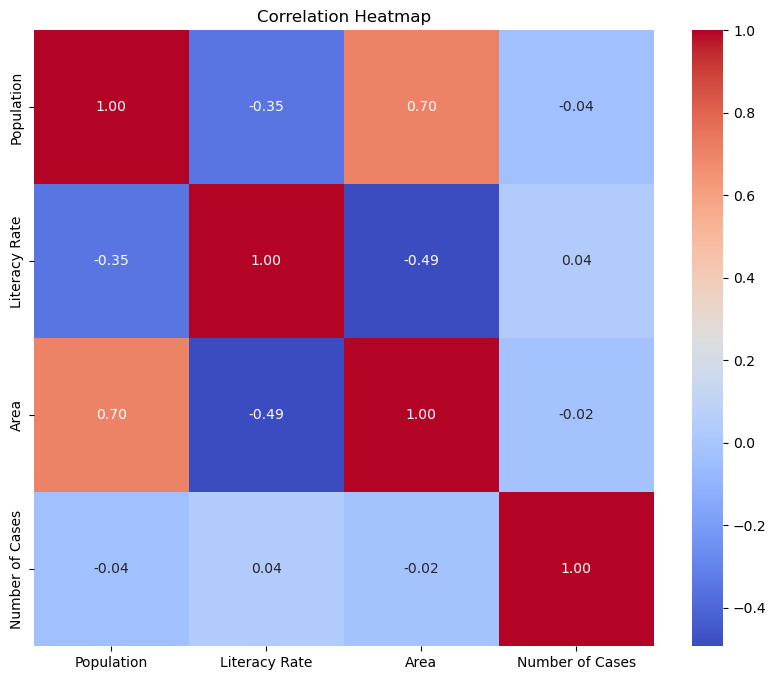

In [25]:
# Merge crime and state data
merged_data = pd.merge(crime_df, state_df, on='State')

# Calculate correlation matrix
correlation_matrix = merged_data[['Population', 'Literacy Rate', 'Area', 'Number of Cases']].corr()

# Plot correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


                 4.4   Capstone project overall story in your own words. Min 1000 words.

                                            

The capstone project aimed to analyze crime data and provide insights into the factors influencing crime rates across different areas. Through data collection, preprocessing, and analysis, various aspects such as literacy rates, population density, and area size were examined to understand their relationship with crime. The clustering analysis segmented the data into three clusters, identifying Sensitive, Moderate, and Peaceful Areas based on crime rates and socio-economic conditions. Insights gained from the analysis can inform policymakers and law enforcement agencies to develop targeted strategies for crime prevention and community safety. The project demonstrates the application of data science techniques in addressing real-world challenges and providing actionable insights for decision-making.